In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("CSV.csv")

In [4]:
import matplotlib.pyplot as plt


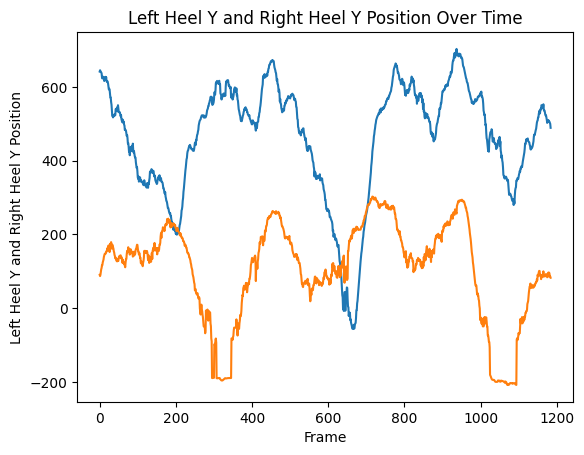

In [5]:
l_heel_y = df['left_heel_y']
r_heel_y=df['right_heel_y']
plt.plot(range(len(l_heel_y)), l_heel_y,r_heel_y)

plt.xlabel('Frame')
plt.ylabel('Left Heel Y and Right Heel Y Position')
plt.title('Left Heel Y and Right Heel Y Position Over Time')
plt.show()


Left Heel Swing Times (s): [0.06666666666666667, 0.1, 0.16666666666666666, 0.7666666666666667, 0.1, 0.7, 0.03333333333333333, 0.03333333333333333, 0.06666666666666667, 0.06666666666666667, 0.3333333333333333, 0.23333333333333334, 0.5333333333333333, 0.3, 0.36666666666666664, 0.2, 0.13333333333333333, 0.16666666666666666, 0.36666666666666664, 0.6666666666666666, 0.6666666666666666, 0.8666666666666667, 0.1, 0.16666666666666666, 0.03333333333333333, 0.3333333333333333, 0.2, 0.06666666666666667, 0.5, 0.1, 0.8333333333333334, 0.4666666666666667, 0.2, 0.16666666666666666, 0.4, 0.06666666666666667, 0.06666666666666667, 0.8, 0.13333333333333333, 0.6666666666666666, 0.6333333333333333, 0.4, 0.06666666666666667, 0.3333333333333333, 0.6333333333333333, 0.1, 0.03333333333333333, 0.03333333333333333, 0.2, 0.13333333333333333, 0.06666666666666667, 0.03333333333333333, 0.06666666666666667, 0.23333333333333334, 0.03333333333333333, 0.3333333333333333, 0.6, 0.4666666666666667, 1.4, 0.2, 0.1, 1.03333333

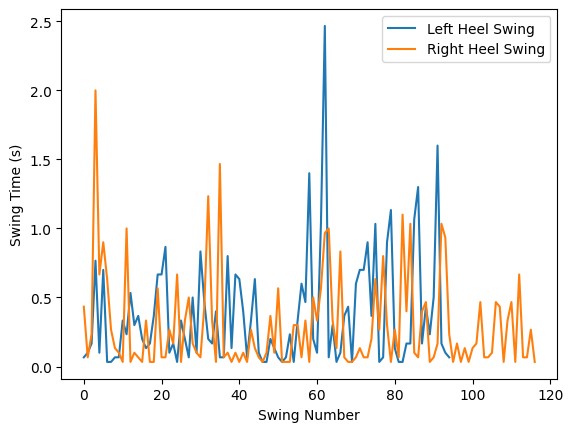

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

threshold = 3  
frame_rate = 30  

left_heel_x = df['left_heel_x'].values
left_heel_y = df['left_heel_y'].values
right_heel_x = df['right_heel_x'].values
right_heel_y = df['right_heel_y'].values

left_step_times = []
right_step_times = []

def detect_step_times(heel_x, heel_y):
    step_times = []
    swing_start = None
    stance_start = None

    for frame in range(1, len(heel_x)):
        x_diff = abs(heel_x[frame] - heel_x[frame - 1])
        y_diff = abs(heel_y[frame] - heel_y[frame - 1])

       
        if x_diff > threshold or y_diff > threshold:
            if swing_start is None:  
                swing_start = frame
            if stance_start is not None: 
                stance_duration = (frame - stance_start) / frame_rate
                step_times.append(('stance', stance_duration))
                stance_start = None
        else:  
            if swing_start is not None:  
                swing_duration = (frame - swing_start) / frame_rate
                step_times.append(('swing', swing_duration))
                swing_start = None
            if stance_start is None:
                stance_start = frame

    if swing_start is not None:
        swing_duration = (len(heel_x) - swing_start) / frame_rate
        step_times.append(('swing', swing_duration))
    if stance_start is not None:
        stance_duration = (len(heel_x) - stance_start) / frame_rate
        step_times.append(('stance', stance_duration))

    return step_times

left_step_times = detect_step_times(left_heel_x, left_heel_y)
right_step_times = detect_step_times(right_heel_x, right_heel_y)

left_swing_times = [time for type_, time in left_step_times if type_ == 'swing']
right_swing_times = [time for type_, time in right_step_times if type_ == 'swing']
left_stance_times = [time for type_, time in left_step_times if type_ == 'stance']
right_stance_times = [time for type_, time in right_step_times if type_ == 'stance']

print("Left Heel Swing Times (s):", left_swing_times)
print("Right Heel Swing Times (s):", right_swing_times)

plt.plot(range(len(left_swing_times)), left_swing_times, label='Left Heel Swing')
plt.plot(range(len(right_swing_times)), right_swing_times, label='Right Heel Swing')
plt.xlabel("Swing Number")
plt.ylabel("Swing Time (s)")
plt.legend()
plt.show()


Step Times (s): [0.36666666666666664, 0.16666666666666666, 0.03333333333333333, 0.06666666666666667, 0.7333333333333333, 0.4666666666666667, 1.5666666666666667, 1.4333333333333333, 0.7, 0.6333333333333333, 0.5666666666666667, 0.4666666666666667, 0.36666666666666664, 0.0, 0.7, 0.43333333333333335, 0.13333333333333333, 0.8, 0.4666666666666667, 0.06666666666666667, 0.16666666666666666, 0.5, 0.3333333333333333, 0.13333333333333333, 0.26666666666666666, 0.03333333333333333, 0.6666666666666666, 0.5, 0.36666666666666664, 0.26666666666666666, 0.7666666666666667, 0.06666666666666667, 0.8333333333333334, 0.7, 0.5666666666666667, 0.4666666666666667, 0.4, 0.0, 0.06666666666666667, 0.06666666666666667, 0.0, 0.6, 0.4, 0.3, 0.1, 0.0, 0.1, 0.13333333333333333, 0.16666666666666666, 0.06666666666666667, 0.4666666666666667, 0.26666666666666666, 0.43333333333333335, 0.26666666666666666, 0.6, 0.5333333333333333, 0.13333333333333333, 0.4666666666666667, 0.03333333333333333, 0.16666666666666666, 0.0666666666

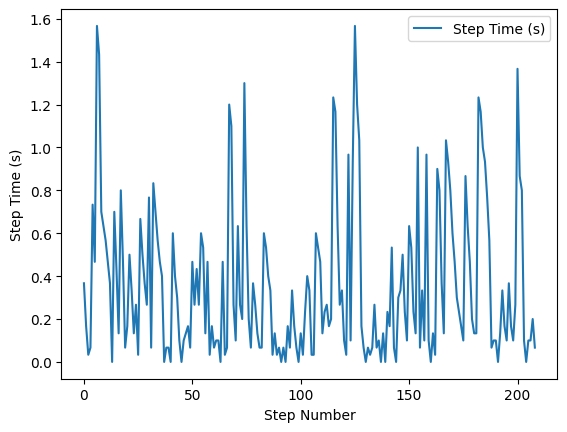

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

threshold = 3 
frame_rate = 30 

left_heel_x = df['left_heel_x'].values
left_heel_y = df['left_heel_y'].values
right_heel_x = df['right_heel_x'].values
right_heel_y = df['right_heel_y'].values

left_step_times = []
right_step_times = []

def detect_heel_strikes(heel_x, heel_y):
    heel_strikes = []
    swing_start = None
    for frame in range(1, len(heel_x)):
        x_diff = abs(heel_x[frame] - heel_x[frame - 1])
        y_diff = abs(heel_y[frame] - heel_y[frame - 1])

        if x_diff <= threshold and y_diff <= threshold: 
            if swing_start is not None:  
                heel_strikes.append(frame)
                swing_start = None
        else: 
            if swing_start is None:
                swing_start = frame

    return heel_strikes

left_heel_strikes = detect_heel_strikes(left_heel_x, left_heel_y)
right_heel_strikes = detect_heel_strikes(right_heel_x, right_heel_y)

def calculate_step_times(left_strikes, right_strikes):
    step_times = []
    i, j = 0, 0
    while i < len(left_strikes) and j < len(right_strikes):
        left_strike = left_strikes[i]
        right_strike = right_strikes[j]
        
        if left_strike < right_strike:
            step_duration = (right_strike - left_strike) / frame_rate
            step_times.append(step_duration)
            i += 1  
        else:
            step_duration = (left_strike - right_strike) / frame_rate
            step_times.append(step_duration)
            j += 1 

    return step_times

step_times = calculate_step_times(left_heel_strikes, right_heel_strikes)

print("Step Times (s):", step_times)

print(len(step_times))
print(sum(step_times)/2)

plt.plot(range(len(step_times)), step_times, label='Step Time (s)')
plt.xlabel("Step Number")
plt.ylabel("Step Time (s)")
plt.legend()
plt.show()
